### Car Price Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data set
data = pd.read_csv('car_price.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB


The given data set have only 3 numaric columns and 5 categorical columns also Extra colums has random extra feacures so to make data ready for model making

1. Convert Extras column in to boolean column for each unique feachers in it.
2. Convert all categorical values into numeric form

In [4]:
# To Check null values
data.isnull().sum()

make_model      0
body_type       0
Body Color      0
km              0
hp              0
Gearing Type    0
Extras          0
price           0
dtype: int64

No null value in data


array([[<AxesSubplot:title={'center':'km'}>,
        <AxesSubplot:title={'center':'hp'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

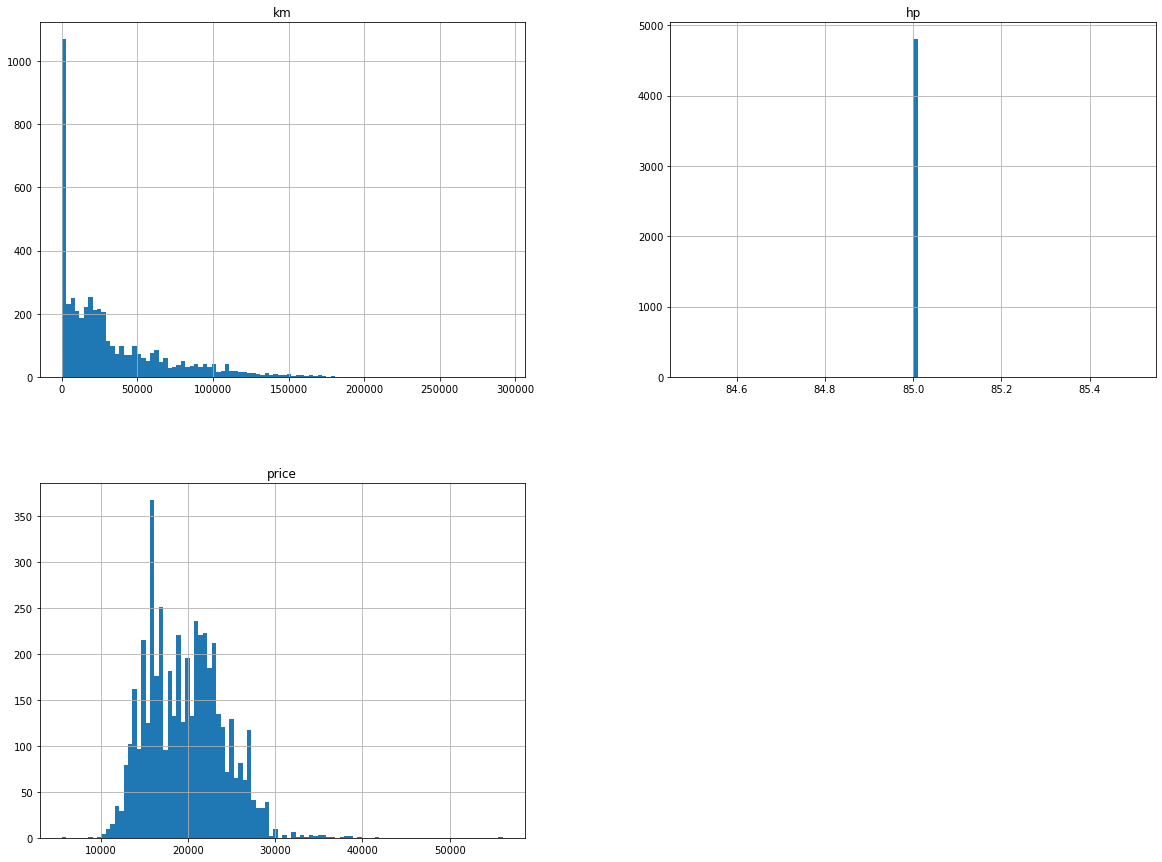

In [5]:
# For plotting histogram
data.hist(bins=100, figsize=(20, 15))

In [5]:
data

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790
...,...,...,...,...,...,...,...,...
4795,Audi A3,Sedans,White,54,85,Manual,"Alloy wheels,Sport seats,Sport suspension,Voic...",25000
4796,Audi A3,Sedans,White,50,85,Manual,Alloy wheels,24980
4797,Audi A3,Station wagon,Silver,6666,85,Manual,"Alloy wheels,Roof rack",24980
4798,Audi A3,Sedans,Silver,10,85,Manual,"Alloy wheels,Roof rack",24980


In [6]:
data.hp.unique()

array([85], dtype=int64)

As there is only one single value '85' in   data <b>hp</b> column we candrop that column to simplify the model

In [7]:
data.drop('hp', inplace= True , axis = 1)

##### 1. Convert Extras column in to boolean column for each unique feachers in it.

Now Extras column has more than one features to first we will find out all unique values from extras column

In [8]:
feature_list = []
for extra in data['Extras']:
    for feature in extra.split(','):
        if feature not in feature_list:
            feature_list.append(feature)
print('all features are : ', feature_list)
print()
print('total number of features :', len(feature_list))

all features are :  ['Alloy wheels', 'Catalytic Converter', 'Voice Control', 'Sport seats', 'Sport suspension', 'Sport package', 'Shift paddles', 'Winter tyres', 'Touch screen', 'Handicapped enabled', 'Trailer hitch', 'Roof rack', 'Cab or rented Car', 'Tuned car', 'Ski bag', 'Right hand drive']

total number of features : 16


###### Now first we create a new dataframe for all extra features 

In [9]:
# to create empty data frame
df_extra = pd.DataFrame(columns=feature_list)

In [10]:
for extra in data['Extras']:
    d = {'Alloy wheels': 0, 'Catalytic Converter': 0, 'Voice Control': 0,
         'Sport seats': 0, 'Sport suspension': 0, 'Sport package': 0, 'Shift paddles' :0, 
         'Winter tyres': 0, 'Touch screen': 0, 'Handicapped enabled': 0, 'Trailer hitch' : 0,
         'Roof rack': 0, 'Cab or rented Car': 0, 'Tuned car': 0, 'Ski bag': 0, 'Right hand drive': 0}
    for feature in extra.split(','):
        d[feature]= 1
    df_extra = df_extra.append(d, ignore_index=True)

In [11]:
df_extra.head()

,Alloy wheels,Catalytic Converter,Voice Control,Sport seats,Sport suspension,Sport package,Shift paddles,Winter tyres,Touch screen,Handicapped enabled,Trailer hitch,Roof rack,Cab or rented Car,Tuned car,Ski bag,Right hand drive
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0


Now we can drop <b>Extras</b> and append the df_extra data frame


In [12]:
final_data = pd.concat([data, df_extra], axis= 1)
final_data.drop('Extras', inplace=True, axis =1)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           4800 non-null   object
 1   body_type            4800 non-null   object
 2   Body Color           4800 non-null   object
 3   km                   4800 non-null   int64 
 4   Gearing Type         4800 non-null   object
 5   price                4800 non-null   int64 
 6   Alloy wheels         4800 non-null   object
 7   Catalytic Converter  4800 non-null   object
 8   Voice Control        4800 non-null   object
 9   Sport seats          4800 non-null   object
 10  Sport suspension     4800 non-null   object
 11  Sport package        4800 non-null   object
 12  Shift paddles        4800 non-null   object
 13  Winter tyres         4800 non-null   object
 14  Touch screen         4800 non-null   object
 15  Handicapped enabled  4800 non-null   object
 16  Traile

#### 2. Convert all categorical columns in numeric form

In [14]:
# list of categorical columns
cat_col = ['make_model', 'body_type', 'Body Color', 'Gearing Type']

# Function to convert all categorical values in numeric

def converter(df):
    for i, name in enumerate(df.unique()):
        df = df.replace(name, i+1, regex=True )
    return df

In [15]:
# Conversion 

for tag in cat_col:
    final_data[tag]=converter(final_data[tag])

In [16]:
final_data.head()

,make_model,body_type,Body Color,km,Gearing Type,price,Alloy wheels,Catalytic Converter,Voice Control,Sport seats,...,Shift paddles,Winter tyres,Touch screen,Handicapped enabled,Trailer hitch,Roof rack,Cab or rented Car,Tuned car,Ski bag,Right hand drive
0,1,1,1,56013,1,15770,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,80000,1,14500,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,83450,1,14640,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,73000,1,14500,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,16200,1,16790,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Train and Test Splits

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(final_data, test_size=0.2, random_state=42)

In [18]:
train_set_x = train_set.drop('price', axis =1)
train_set_y = train_set['price']
test_set_x = test_set.drop('price', axis =1)
test_set_y = test_set['price']

In [19]:
train_set_x.head()

,make_model,body_type,Body Color,km,Gearing Type,Alloy wheels,Catalytic Converter,Voice Control,Sport seats,Sport suspension,...,Shift paddles,Winter tyres,Touch screen,Handicapped enabled,Trailer hitch,Roof rack,Cab or rented Car,Tuned car,Ski bag,Right hand drive
2758,3,1,4,11200,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2850,3,1,5,98857,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4440,3,1,4,10,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4576,3,1,6,10,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1774,1,3,1,10,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_set_x.isnull().sum()

make_model             0
body_type              0
Body Color             0
km                     0
Gearing Type           0
Alloy wheels           0
Catalytic Converter    0
Voice Control          0
Sport seats            0
Sport suspension       0
Sport package          0
Shift paddles          0
Winter tyres           0
Touch screen           0
Handicapped enabled    0
Trailer hitch          0
Roof rack              0
Cab or rented Car      0
Tuned car              0
Ski bag                0
Right hand drive       0
dtype: int64

#### Model Training

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_set_x, train_set_y)

LinearRegression()

In [22]:
#select any number from 0 to 959 
def create_predict_data(num):
    data1 = test_set_x.iloc[num,:]
    df_p = pd.DataFrame(data1)
    print(data1)
    print('------------------------------')
    print('Actual Value : ', test_set_y.iloc[num])
    return df_p.T

In [23]:
predict_data = create_predict_data(0)

make_model                  1
body_type                   1
Body Color                  1
km                     100000
Gearing Type                2
Alloy wheels                1
Catalytic Converter         0
Voice Control               1
Sport seats                 1
Sport suspension            1
Sport package               1
Shift paddles               0
Winter tyres                1
Touch screen                0
Handicapped enabled         0
Trailer hitch               0
Roof rack                   0
Cab or rented Car           0
Tuned car                   0
Ski bag                     0
Right hand drive            0
Name: 596, dtype: object
------------------------------
Actual Value :  11950


In [24]:
model.predict(predict_data)

array([11987.05124972])

In [25]:
l = []
for i in range(100):
    act = test_set_y.iloc[i]
    print('Actual Value : ', act)
    data1 = test_set_x.iloc[i,:]
    df_p = pd.DataFrame(data1)
    predict_data = df_p.T
    pre = model.predict(predict_data)
    print('predicted : ', pre[0])
    
    l1 = [act, pre[0]]
    l.append(l1)
    
    

Actual Value :  11950
predicted :  11987.05124971822
Actual Value :  19000
predicted :  21644.785652516908
Actual Value :  19890
predicted :  21767.050432364056
Actual Value :  15790
predicted :  16440.129475209025
Actual Value :  16700
predicted :  16257.318100608878
Actual Value :  12890
predicted :  13902.027056920344
Actual Value :  20009
predicted :  18651.428437062423
Actual Value :  14700
predicted :  16761.498065020893
Actual Value :  18945
predicted :  19009.03454987268
Actual Value :  16760
predicted :  16555.79890716944
Actual Value :  21999
predicted :  23281.71315135386
Actual Value :  22300
predicted :  24049.435731820922
Actual Value :  15000
predicted :  20289.427717495786
Actual Value :  17000
predicted :  20031.60732901504
Actual Value :  16930
predicted :  17570.89735652226
Actual Value :  13480
predicted :  11681.636065061572
Actual Value :  26488
predicted :  24956.08493379114
Actual Value :  15900
predicted :  17039.65418431661
Actual Value :  15065
predicted :  1

#### Accuracy checking

In [26]:
acc = pd.DataFrame(l, columns= ['Actual','predicted'])

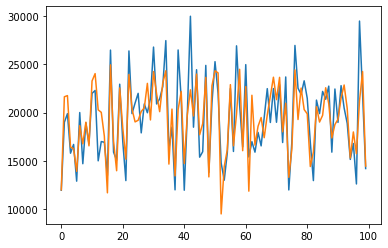

In [27]:
plt.plot(l)
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_set_x, train_set_y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("Mean: ", scores.mean())
print("Standard deviation: ", scores.std())

Mean:  -8579346.729248011
Standard deviation:  1198535.5214833056


# Model Making

In [6]:
from joblib import dump, load
dump(model, 'car_pred.joblib') 

NameError: name 'model' is not defined

#### for HTML Inputs

In [42]:
feature_list = []
for extra in data['Extras']:
    for feature in extra.split(','):
        if feature not in feature_list:
            feature_list.append(feature)
print('all features are : ', feature_list)
print()
print('total number of features :', len(feature_list))

all features are :  ['Alloy wheels', 'Catalytic Converter', 'Voice Control', 'Sport seats', 'Sport suspension', 'Sport package', 'Shift paddles', 'Winter tyres', 'Touch screen', 'Handicapped enabled', 'Trailer hitch', 'Roof rack', 'Cab or rented Car', 'Tuned car', 'Ski bag', 'Right hand drive']

total number of features : 16


In [43]:
for i, v in enumerate(feature_list):
    print(f'<option value={i+1}>{v}</option>')

<option value=1>Alloy wheels</option>
<option value=2>Catalytic Converter</option>
<option value=3>Voice Control</option>
<option value=4>Sport seats</option>
<option value=5>Sport suspension</option>
<option value=6>Sport package</option>
<option value=7>Shift paddles</option>
<option value=8>Winter tyres</option>
<option value=9>Touch screen</option>
<option value=10>Handicapped enabled</option>
<option value=11>Trailer hitch</option>
<option value=12>Roof rack</option>
<option value=13>Cab or rented Car</option>
<option value=14>Tuned car</option>
<option value=15>Ski bag</option>
<option value=16>Right hand drive</option>


In [54]:

for i , v in enumerate(feature_list):
    print(f'''<label class="switch">
<input type="checkbox" name='{v}'> 
<span class="slider round"></span>
</label> {v} <br>''')
    
    if i == 7:
        print()

<label class="switch">
<input type="checkbox" name='Alloy wheels'> 
<span class="slider round"></span>
</label> Alloy wheels <br>
<label class="switch">
<input type="checkbox" name='Catalytic Converter'> 
<span class="slider round"></span>
</label> Catalytic Converter <br>
<label class="switch">
<input type="checkbox" name='Voice Control'> 
<span class="slider round"></span>
</label> Voice Control <br>
<label class="switch">
<input type="checkbox" name='Sport seats'> 
<span class="slider round"></span>
</label> Sport seats <br>
<label class="switch">
<input type="checkbox" name='Sport suspension'> 
<span class="slider round"></span>
</label> Sport suspension <br>
<label class="switch">
<input type="checkbox" name='Sport package'> 
<span class="slider round"></span>
</label> Sport package <br>
<label class="switch">
<input type="checkbox" name='Shift paddles'> 
<span class="slider round"></span>
</label> Shift paddles <br>
<label class="switch">
<input type="checkbox" name='Winter tyres